# Introducción a python: Integración y Derivación Númerica

## Calculando derivadas

La derivada de una función en una dimensión $f(x)$ se define como:

$$ \frac{d}{dx} f(x) = \lim_{\Delta x\to0}  \frac{f(x+\Delta x)-f(x)}{\Delta x},$$

Esta expresión se interpreta como la tasa de cambio "instantánea" de una cantidad con respecto a $x$.


### Empleando  numpy.diff 

La forma mas simple para calcular la derivada es mediante la aproximación:

$$\frac{df}{dx}\simeq\frac{\Delta f}{\Delta x}$$

La función **diff** del la librería numpy puede emplearse para calcular tanto el numerador como el denominador de esta expresión: 

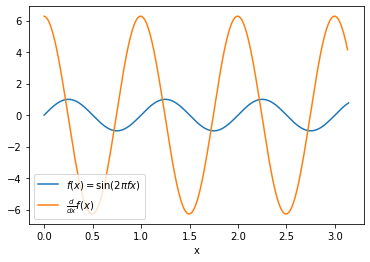

In [1]:
import numpy as np

import matplotlib.pyplot as plt

def wave (x, freq = 2):
    '''Regresa una onda sinusoidal'''
    return np.sin (2*np.pi*freq*x)

delta_x=0.01
freq = 1 #In Hz
x = np.arange(0,np.pi, delta_x)
y = wave(x, freq=freq)
df = np.diff(y)
dx = np.diff(x)
df_dx = df/dx
plt.plot(x,y, label = r"$f(x)=\sin({2\pi fx})$")
plt.plot(x[0:-1],df_dx, label = r"$\frac{d}{dx} f(x)$") #numpy.diff returns an array with one element less
plt.xlabel("x")
plt.legend(loc="best")

Text(0.5, 0, 'x')

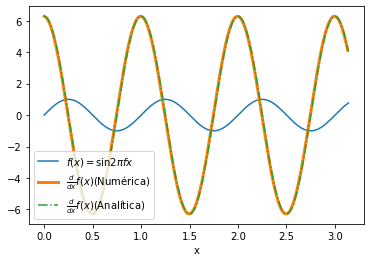

In [2]:
"""Esta es la derivada analítica"""

def dwave(x, freq=2):
    return 2*np.pi*freq*np.cos(2*np.pi*freq*x)

df_dx_exact = dwave(x,freq=freq)
plt.plot(x,y, label = "$f(x)=\sin{2\pi fx}$")
plt.plot(x[0:-1],df_dx, lw=3, label = r"$\frac{d}{dx} f(x)$(Numérica)")
plt.plot(x,df_dx_exact, "-.", label = r"$\frac{d}{dx} f(x)$(Analítica)")
plt.legend(loc="best")
plt.xlabel("x")

Podemos calcular el error de nuestra estimación

Text(0, 0.5, 'Error')

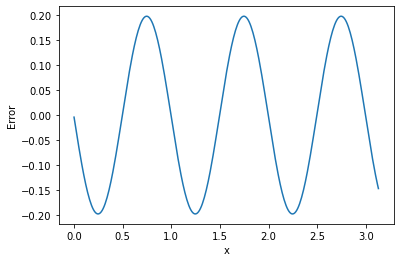

In [3]:
plt.plot(x[0:-1],(df_dx-df_dx_exact[0:-1]))
plt.xlabel("x")
plt.ylabel("Error")

Este método se le conoce como diferencias **hacia adelante o progresivas**. Una alternativa natural es utilizar las diferencias **hacia atrás o regresivas**:

$$\cfrac{d}{dx}f(x)  \simeq \cfrac{f(x-h)-f(x)}{\Delta x}. $$

Por último existe el método de las **diferencias centrales**:

$$\cfrac{d}{dx}f(x)\simeq\cfrac{f(x+h)-f(x-h)}{2\Delta x}.$$ La función **numpy.gradient** aplica la formula de las diferencias centrales.

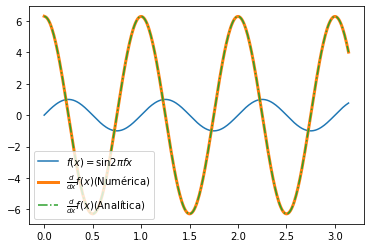

In [4]:
df_dx_gr = np.gradient(y, delta_x, edge_order=2)
plt.plot(x,y, label = "$f(x)=\sin{2\pi fx}$")
plt.plot(x,df_dx_gr, lw=3, label = r"$\frac{d}{dx} f(x)$(Numérica)")
plt.plot(x,df_dx_exact, "-.", label = r"$\frac{d}{dx} f(x)$(Analítica)")
plt.legend()

Text(0, 0.5, 'Error')

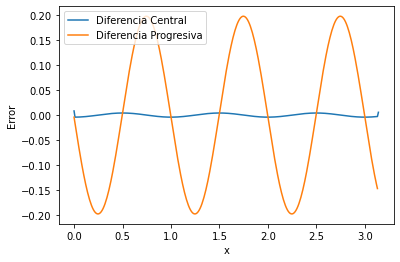

In [5]:
plt.plot(x,(df_dx_gr-df_dx_exact), label = "Diferencia Central")
plt.plot(x[0:-1],(df_dx-df_dx_exact[0:-1]), label = "Diferencia Progresiva")
plt.legend()

plt.xlabel("x")
plt.ylabel("Error")

#### Ejemplo

El archivo *deriv_ex1.dat* contiene las mediciones del movimiento de una partícula en dos dimensiones como función del tiempo. La primer columna tiene la información del tiempo en segundos; la tercera y cuarta columna contienen la posición (x,y) de la particula en metros. Calcular la velocidad inicial y la aceleración de la partícula.

Empecemos por cargar los datos

In [6]:
time, xpos, ypos = np.loadtxt("deriv_ex1.dat", unpack= True) 
#Unpack nos ayuda a copiar las columnas directamente en variables separadas por comas

La velocidad es la primera derivada de la posición con respecto al tiempo:

In [7]:
vx = np.gradient(xpos,time)
vy = np.gradient(ypos,time)

y la aceleración es la segunda derivada:

In [8]:
acx = np.gradient(vx,time)
acy = np.gradient(vy,time)

Grafiquemos:

Text(0.5, 0, 'Tiempo (s)')

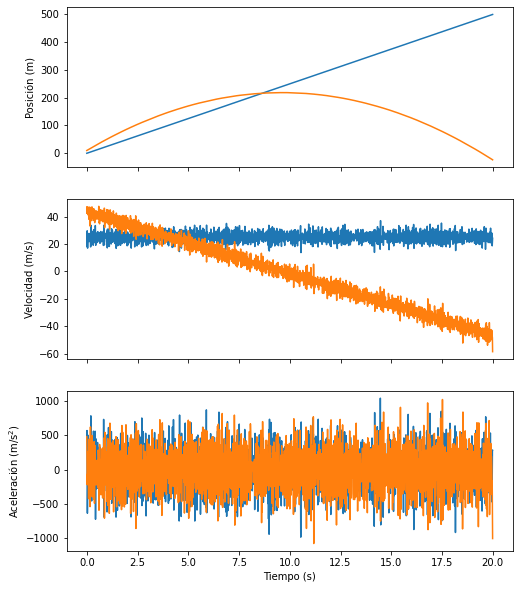

In [9]:
fig, ax = plt.subplots (3,1, figsize=(8,10), sharex=True)
ax[0].plot(time,xpos)
ax[0].plot(time,ypos)
ax[0].set_ylabel("Posición (m)")
ax[1].plot(time,vx)
ax[1].plot(time,vy)
ax[1].set_ylabel("Velocidad (m/s)")
ax[2].plot(time,acx)
ax[2].plot(time,acy)
ax[2].set_ylabel("Aceleración (m/s$^2$)")
ax[2].set_xlabel("Tiempo (s)")


La gráfica de la aceleración no permite determinar un valor de manera sencilla. Este efecto es debido a la presencia de ruido; es decir, el algoritmo de la estimación de la derivada **amplifica** el ruido presente en  nuestros datos. 

En la práctica se puede aplicar un filtro pasa-bajas antes de realizar la derivada o bien usar funciones interpolantes como un polinómio o splines. Veamos un ejemplo con el filtro Savitzky-Golay, el cual utiliza polinomios para ajustar los datos:

Existen métodos que usan un mayor número de puntos del conjunto de datos para calcular la derivada. Por lo general estos métodos tienen una mayor precisión. Por ejemplo, la formula de 5 puntos:
$$\cfrac{d^2}{dx^2} f(x) \simeq \cfrac {-f(x+2h)+16f(x+h)-30f(x)+16f(x-h)-f(x-2h)}{12h^2}.$$

In [1]:
import scipy.signal as sig

def fivept2 (data, h=1.):
    """ Calcula la derivada de un conjunto de datos empleando la formula
        de 5 puntos
        
        El número de datos debe ser par.
    """
    ndata = len(data)
    
    deriv = -data[4:]+16.*data[3:-1]-30*data[2:-2]+16.*data[1:-3]-data[:-4]
    deriv/=12.*h**2
    
    return deriv

acx5 = fivept2(xpos, time[1]-time[0])
acy5 = fivept2(ypos, time[1]-time[0])

plt.plot(time[2:-2], acx5)
plt.plot(time[2:-2], acy5)
plt.suptitle("Acceleration")
plt.ylabel("m/s$^2$")
plt.xlabel("Time (s)")

NameError: name 'xpos' is not defined

Desafortunadamente observamos que los datos no permiten distinguir un valor para la segunda derivada. Esto es debido a que la derivación numérica **amplifica** el ruido presente en los datos. Como alternativa podemos usar un filtro para reducir el ruido o bien ajustar una conjunto de funciones que puedan ser derivadas con facilidad. Por ejemplo, el filtro Savitzky-Golay:

Text(0.5, 0, 'Tiempo (s)')

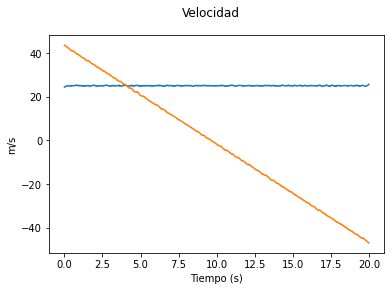

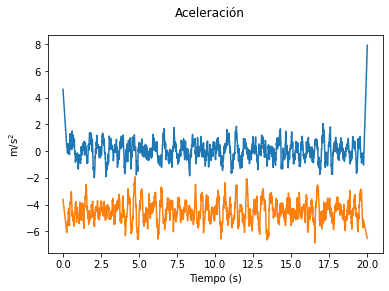

In [10]:
import scipy.signal as sig

vx = sig.savgol_filter(xpos,51,3, deriv=1, delta = time[1]-time[0])
vy = sig.savgol_filter(ypos,51,3, deriv=1, delta = time[1]-time[0])
acx = sig.savgol_filter(xpos,51,3, deriv=2, delta = time[1]-time[0])
acy = sig.savgol_filter(ypos,51,3, deriv=2, delta = time[1]-time[0])

plt.plot(time,vx)
plt.plot(time,vy)
plt.suptitle("Velocidad")
plt.ylabel("m/s")
plt.xlabel("Tiempo (s)")

plt.figure()
plt.plot(time,acx)
plt.plot(time,acy)
plt.suptitle("Aceleración")
plt.ylabel("m/s$^2$")
plt.xlabel("Tiempo (s)")

Nótese que el filtro ***suaviza*** las variaciones de las derivadas al incluir la información de 51 puntos para ajustar un polinómio de tercer grado que represente los datos. A la vez, hay que notar que se pierde la información hacia los extremos del conjunto de datos. Asumiendo que la aceleración es constante obtenemos:

In [2]:
print ("Velocidad Inicial Vx={:f} m/s, Vy={:f} m/s".format(vx[0],vy[0]))
print ("Aceleración Ax=%.2f m/s^2, Ay=%.2f m/s^2" % (acx.mean(), acy.mean()))

NameError: name 'vx' is not defined

## Integración

Empecemos con la integral definida:

$$\int_a^b f(x) \mathrm{d}x = \lim_{\Delta x \to 0} \sum_{i=0}^{N} f(a+i\Delta x) \Delta x ,$$

donde $N=(b-a)/\Delta x$.

Recordemos que representa el área bajo la curva $f(x)$ entre $x=a$ y $x=b$. La integración numérica es útil cuando no se conoce la integral indefinida de la función. El ejemplo clásico es la función:

$$f(x) = e^{-x^2}.$$

Inclusive los paquetes de cálculo símbolico como **sympy** definen esta integral de forma recursiva:

In [12]:
import sympy as sym

x = sym.symbols('x')
fx = sym.Integral(sym.exp(-x*x))
sym.Eq(fx,fx.doit())

Eq(Integral(exp(-x**2), x), sqrt(pi)*erf(x)/2)

Donde *erf* es:
$$ \mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} \mathrm{d}t$$


### La regla del trapecio

Calculemos la integral utilizando el trapecio definido en la siguiente figura:

![Integration](integral_demo.png)

El área de dicho trapecio es:

$$ A = (b-a)*f(a) + \cfrac{1}{2}(b-a)*(f(b)-f(a))$$

o bien:

$$ A = (b-a)\cfrac{f(b)+f(a)}{2}  $$.

Pero podemos dividir ese intervalo en varios trapecios:

![Integration](integral2_demo.png)

Este método esta implementado en la función <b>numpy.trapz</b>. Veamos un ejemplo:

In [13]:
def exp2 (x):
    return np.exp(-x**2)

deltax = 0.4
x = np.arange(-10,10,deltax)
y = exp2(x)

I = np.trapz(y,dx=deltax)

print ("Resultado de la integral {}".format(I))
print ("Que se aproxima a: ",sym.nsimplify(I,[sym.pi]))
print ("El error es: ", I-np.sqrt(np.pi))

Resultado de la integral 1.7724538509055145
Que se aproxima a:  sqrt(pi)
El error es:  -1.3322676295501878e-15


Existen varias funciones que trabajan en datos tabulados. Por ejemplo, la función **simps** implementa el método de Simpson, el cual utiliza una aproximación parabólica en lugar del trapecio:
$$A=\frac{b-a}{6} \left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]$$ 


In [14]:
from scipy.integrate import simps
I2 = simps(y,dx=deltax)
print ("El resultado de la integral es: ",sym.nsimplify(I2,[sym.pi]))
print ("El error: ", I2-np.sqrt(np.pi))

El resultado de la integral es:  sqrt(pi)
El error:  -1.3322676295501878e-15


Existen varias funciones para integración de funciones, un ejemplo es la función **quad** la cual permite incluir límites que tienden a infinito:


In [15]:
from scipy.integrate import quad
I2, Ierr = quad(exp2,-np.inf, np.inf, limit=1000)
print ("El resultado de la integral es: ",sym.nsimplify(I2,[sym.pi]))
print ("Con un error estimado de: ", Ierr)

El resultado de la integral es:  sqrt(pi)
Con un error estimado de:  1.4202636780944923e-08


Nótese que pasamos una función de *python* como argumento en lugar de datos tabulados.

## Métodos Monte Carlo
    
Usando números aleatorios determinamos la relación entre un área conocida y el área que deseamos integrar. Ejemplo: calcular el area de un círculo de radio $r=5$.

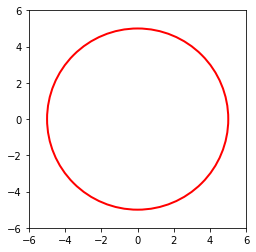

In [16]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Polygon

radius= 5.
circ = plt.Circle((0,0),radius, fill=None, ec="red", lw=2)

fig, ax = plt.subplots()
ax.add_artist(circ)
plt.xlim(-radius-1,radius+1)
plt.ylim(-radius-1,radius+1)
plt.gca().set_aspect('equal')


El área conocida sera un cuadrado de lado 10, cuya área es $10^2$

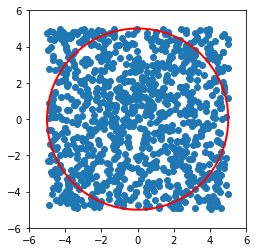

In [17]:
npts = 1000

pts = rnd.uniform(low=-radius, high=radius, size=2*npts)
x = pts[0::2]
y = pts[1::2]

circ = plt.Circle((0,0),radius, fill=None, ec="red", lw=2)
plt.scatter(x,y)

plt.gca().add_artist(circ)
plt.xlim(-radius-1,radius+1)
plt.ylim(-radius-1,radius+1)
plt.gca().set_aspect('equal')

Area del circulo : 78.37
Usando $\pi r^2$ : 78.53981633974483


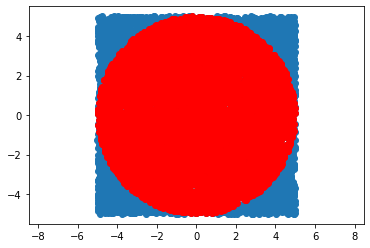

In [19]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt

npts = 10000
radius= 5.

pts = rnd.uniform(low=-radius, high=radius, size=2*npts)
x = pts[0::2]
y = pts[1::2]


plt.scatter(x,y)
plt.gca().set_aspect('equal', 'datalim')
r = np.sqrt(x**2+y**2)
w = np.where (r<radius)
plt.scatter(x[w],y[w], color = "red")

Asquare = (2*(radius))**2
Acircle = Asquare* len(x[w]) / npts

print ("Area del circulo :", Acircle)
print ("Usando $\pi r^2$ :",np.pi*radius**2)

**Ejercicio** Repetir la integración de la función del cuerpo negro con el método MC. Sugerencia. Distribuya los números aleatorios en el espacio logarítmico.